In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 透過list建立一個Series

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 透過一個numpy array 建立DataFrame

In [4]:
##periods數量
dates = pd.date_range('20130101', periods = 6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,-0.777776,0.733520,0.301505,1.149861
2013-01-02,-0.471017,0.209447,0.286066,-0.140525
2013-01-03,-1.238197,2.257030,-0.803479,0.269362
2013-01-04,0.017584,-0.110726,0.052797,0.796943
2013-01-05,-1.186271,0.182065,0.555394,0.242455
2013-01-06,0.059354,-0.599238,0.195400,-0.234581


### 通過傳遞一個能夠被轉換成類似序列結構的字典對象來建立一個DataFrame

In [8]:
df2 = pd.DataFrame({"A" : 1.,\
                    "B" : pd.Timestamp('20130102'),\
                    "C" : pd.Series(1, index = list(range(4)), dtype = "float32"),\
                    "D" : np.array([3] * 4, dtype = "int32"),\
                    "E" : pd.Categorical(["test", "train", "test", "train"]),\
                    "F" : "foo"})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 查看不同列的數據類型

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 查看DataFrame的頭部和尾部的行

In [11]:
df.head()

,A,B,C,D
2013-01-01,-0.777776,0.733520,0.301505,1.149861
2013-01-02,-0.471017,0.209447,0.286066,-0.140525
2013-01-03,-1.238197,2.257030,-0.803479,0.269362
2013-01-04,0.017584,-0.110726,0.052797,0.796943
2013-01-05,-1.186271,0.182065,0.555394,0.242455


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,0.017584,-0.110726,0.052797,0.796943
2013-01-05,-1.186271,0.182065,0.555394,0.242455
2013-01-06,0.059354,-0.599238,0.195400,-0.234581


### 顯示索引、列和底層的numpy數據

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[-0.77777566,  0.7335204 ,  0.30150549,  1.14986125],
       [-0.47101679,  0.20944662,  0.28606644, -0.14052544],
       [-1.2381966 ,  2.2570303 , -0.80347896,  0.26936217],
       [ 0.01758414, -0.11072626,  0.05279741,  0.79694302],
       [-1.18627106,  0.18206463,  0.55539383,  0.24245522],
       [ 0.05935388, -0.59923793,  0.19540039, -0.23458058]])

### describe() 函數對於數據的快速統計匯總

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.599387,0.445350,0.097947,0.347253
std,0.568402,0.988998,0.471208,0.536639
min,-1.238197,-0.599238,-0.803479,-0.234581
25%,-1.084147,-0.037529,0.088448,-0.044780
50%,-0.624396,0.195756,0.240733,0.255909
75%,-0.104566,0.602502,0.297646,0.665048
max,0.059354,2.257030,0.555394,1.149861


### 對數據的轉置

In [17]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.777776,-0.471017,-1.238197,0.017584,-1.186271,0.059354
B,0.733520,0.209447,2.257030,-0.110726,0.182065,-0.599238
C,0.301505,0.286066,-0.803479,0.052797,0.555394,0.195400
D,1.149861,-0.140525,0.269362,0.796943,0.242455,-0.234581


### 按軸進行排序

In [18]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,1.149861,0.301505,0.733520,-0.777776
2013-01-02,-0.140525,0.286066,0.209447,-0.471017
2013-01-03,0.269362,-0.803479,2.257030,-1.238197
2013-01-04,0.796943,0.052797,-0.110726,0.017584
2013-01-05,0.242455,0.555394,0.182065,-1.186271
2013-01-06,-0.234581,0.195400,-0.599238,0.059354


### 按值進行排序

In [19]:
df.sort_values(by = "B")

,A,B,C,D
2013-01-06,0.059354,-0.599238,0.195400,-0.234581
2013-01-04,0.017584,-0.110726,0.052797,0.796943
2013-01-05,-1.186271,0.182065,0.555394,0.242455
2013-01-02,-0.471017,0.209447,0.286066,-0.140525
2013-01-01,-0.777776,0.733520,0.301505,1.149861
2013-01-03,-1.238197,2.257030,-0.803479,0.269362


# 選擇

### 獲取
### 選擇一個單獨的列，將會返回Series，等同於df.A

In [20]:
df["A"]

2013-01-01   -0.777776
2013-01-02   -0.471017
2013-01-03   -1.238197
2013-01-04    0.017584
2013-01-05   -1.186271
2013-01-06    0.059354
Freq: D, Name: A, dtype: float64

In [21]:
df.A

2013-01-01   -0.777776
2013-01-02   -0.471017
2013-01-03   -1.238197
2013-01-04    0.017584
2013-01-05   -1.186271
2013-01-06    0.059354
Freq: D, Name: A, dtype: float64

### 通過[ ] 進行選擇，將會對行進行切片

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,-0.777776,0.733520,0.301505,1.149861
2013-01-02,-0.471017,0.209447,0.286066,-0.140525
2013-01-03,-1.238197,2.257030,-0.803479,0.269362


In [23]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.471017,0.209447,0.286066,-0.140525
2013-01-03,-1.238197,2.257030,-0.803479,0.269362
2013-01-04,0.017584,-0.110726,0.052797,0.796943


# 通過標籤選擇

### 使用標籤來獲取一個交叉的區域

In [24]:
df.loc[dates[0]]

A   -0.777776
B    0.733520
C    0.301505
D    1.149861
Name: 2013-01-01 00:00:00, dtype: float64

### 通過標籤來在多個軸上進行選擇

In [25]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,-0.777776,0.733520
2013-01-02,-0.471017,0.209447
2013-01-03,-1.238197,2.257030
2013-01-04,0.017584,-0.110726
2013-01-05,-1.186271,0.182065
2013-01-06,0.059354,-0.599238


### 標籤切片

In [26]:
df.loc["20130102":"20130104",["A","B"]]

,A,B
2013-01-02,-0.471017,0.209447
2013-01-03,-1.238197,2.257030
2013-01-04,0.017584,-0.110726


### 對於返回的對象進行維度縮減

In [27]:
df.loc["20130102", ["A", "B"]]

A   -0.471017
B    0.209447
Name: 2013-01-02 00:00:00, dtype: float64

## 獲取一個標量

In [28]:
df.loc[dates[0], "A"]

-0.77777566157761646

### 快速訪問一個標量 等同上

In [29]:
df.at[dates[0], "A"]

-0.77777566157761646

# 通過位置選擇

### 通過傳遞數值進行位置選擇(選擇的是行)

In [30]:
df.iloc[3]

A    0.017584
B   -0.110726
C    0.052797
D    0.796943
Name: 2013-01-04 00:00:00, dtype: float64

### 通過數值進行切片

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.017584,-0.110726
2013-01-05,-1.186271,0.182065


### 通過指定一個位置的列表

In [32]:
df.iloc[[1, 2, 4],[0, 2]]

,A,C
2013-01-02,-0.471017,0.286066
2013-01-03,-1.238197,-0.803479
2013-01-05,-1.186271,0.555394


### 對行進行切片

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.471017,0.209447,0.286066,-0.140525
2013-01-03,-1.238197,2.257030,-0.803479,0.269362


### 對列進行切片

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.733520,0.301505
2013-01-02,0.209447,0.286066
2013-01-03,2.257030,-0.803479
2013-01-04,-0.110726,0.052797
2013-01-05,0.182065,0.555394
2013-01-06,-0.599238,0.195400


### 獲取特定的值

In [35]:
df.iloc[1, 1]

0.20944662171499429

In [36]:
df.iat[1, 1]

0.20944662171499429

# Boolean索引

### 使用一個單獨列來選擇數據

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-04,0.017584,-0.110726,0.052797,0.796943
2013-01-06,0.059354,-0.599238,0.195400,-0.234581


### 使用 where操作來選擇數據

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.733520,0.301505,1.149861
2013-01-02,NaN,0.209447,0.286066,NaN
2013-01-03,NaN,2.257030,NaN,0.269362
2013-01-04,0.017584,NaN,0.052797,0.796943
2013-01-05,NaN,0.182065,0.555394,0.242455
2013-01-06,0.059354,NaN,0.195400,NaN


### 使用isin() 方法來過濾

In [39]:
df2 = df.copy()

In [40]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.777776,0.733520,0.301505,1.149861,one
2013-01-02,-0.471017,0.209447,0.286066,-0.140525,one
2013-01-03,-1.238197,2.257030,-0.803479,0.269362,two
2013-01-04,0.017584,-0.110726,0.052797,0.796943,three
2013-01-05,-1.186271,0.182065,0.555394,0.242455,four
2013-01-06,0.059354,-0.599238,0.195400,-0.234581,three


In [42]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.238197,2.257030,-0.803479,0.269362,two
2013-01-05,-1.186271,0.182065,0.555394,0.242455,four


# 設置

### 設置一個新的列

In [43]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range("20130102", periods = 6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df["F"] = s1

### 通過標籤設置新的值

In [46]:
df.at[dates[0], "A"] = 0

### 通過位置設置新的值

In [47]:
df.iat[0, 1] = 0

### 通過一個numpy數組設置一組新值

In [48]:
df.loc[:, "D"] = np.array([5] * len(df))

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.301505,5,NaN
2013-01-02,-0.471017,0.209447,0.286066,5,1.0
2013-01-03,-1.238197,2.257030,-0.803479,5,2.0
2013-01-04,0.017584,-0.110726,0.052797,5,3.0
2013-01-05,-1.186271,0.182065,0.555394,5,4.0
2013-01-06,0.059354,-0.599238,0.195400,5,5.0


### 通過where操作來設置新的值

In [50]:
df2 =df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.301505,-5,NaN
2013-01-02,-0.471017,-0.209447,-0.286066,-5,-1.0
2013-01-03,-1.238197,-2.257030,-0.803479,-5,-2.0
2013-01-04,-0.017584,-0.110726,-0.052797,-5,-3.0
2013-01-05,-1.186271,-0.182065,-0.555394,-5,-4.0
2013-01-06,-0.059354,-0.599238,-0.195400,-5,-5.0


# 缺失值處理

### reindex()方法可以對指定軸上的索引進行改變/增加/刪除操作，這將返回原始數據的一個拷貝

In [53]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ["E"])

In [54]:
df1.loc[dates[0]:dates[1], "E"] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.301505,5,NaN,1.0
2013-01-02,-0.471017,0.209447,0.286066,5,1.0,1.0
2013-01-03,-1.238197,2.257030,-0.803479,5,2.0,NaN
2013-01-04,0.017584,-0.110726,0.052797,5,3.0,NaN


### 去掉包函缺失值的行

In [56]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.471017,0.209447,0.286066,5,1.0,1.0


### 對缺失值進行填充

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.301505,5,5.0,1.0
2013-01-02,-0.471017,0.209447,0.286066,5,1.0,1.0
2013-01-03,-1.238197,2.257030,-0.803479,5,2.0,5.0
2013-01-04,0.017584,-0.110726,0.052797,5,3.0,5.0


### 對數據進行Boolean填充 

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 統計 

### 執行描述性統計 

In [59]:
df.mean()

A   -0.469758
B    0.323096
C    0.097947
D    5.000000
F    3.000000
dtype: float64

### 在其他軸上進行相同的操作 

In [60]:
df.mean(1)

2013-01-01    1.325376
2013-01-02    1.204899
2013-01-03    1.443071
2013-01-04    1.591931
2013-01-05    1.710237
2013-01-06    1.931103
Freq: D, dtype: float64

### 對於擁有不同維度，需要對齊的對象進行操作。Pandas會自動延著指定的維度進行廣播

In [61]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.238197,1.257030,-1.803479,4.0,1.0
2013-01-04,-2.982416,-3.110726,-2.947203,2.0,0.0
2013-01-05,-6.186271,-4.817935,-4.444606,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply 

###  對數據應用函數

In [64]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.301505,5,NaN
2013-01-02,-0.471017,0.209447,0.286066,5,1.0
2013-01-03,-1.238197,2.257030,-0.803479,5,2.0
2013-01-04,0.017584,-0.110726,0.052797,5,3.0
2013-01-05,-1.186271,0.182065,0.555394,5,4.0
2013-01-06,0.059354,-0.599238,0.195400,5,5.0


In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.301505,5,NaN
2013-01-02,-0.471017,0.209447,0.587572,10,1.0
2013-01-03,-1.709213,2.466477,-0.215907,15,3.0
2013-01-04,-1.691629,2.355751,-0.163110,20,6.0
2013-01-05,-2.877900,2.537815,0.392284,25,10.0
2013-01-06,-2.818546,1.938577,0.587685,30,15.0


In [66]:
df.apply(lambda x: x.max() - x.min())

A    1.297550
B    2.856268
C    1.358873
D    0.000000
F    4.000000
dtype: float64

# 直方圖

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s

0    0
1    6
2    2
3    4
4    0
5    2
6    1
7    5
8    1
9    2
dtype: int32

In [69]:
s.value_counts()

2    3
1    2
0    2
6    1
5    1
4    1
dtype: int64

# 字符串方法

### Series對象在其Str屬性中配備了一組字符串處理方法，可以很容易的應用到數組中的每個元素

In [70]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合併 

### Concat

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))

In [73]:
df

,0,1,2,3
0,-0.922758,-0.134775,0.747566,0.166571
1,-0.027709,-1.367832,0.907807,0.302559
2,0.535717,-1.850836,-1.553406,1.268859
3,-0.798879,-1.010495,-0.074994,1.639843
4,-1.252253,-0.367532,1.431160,-0.656243
5,0.350060,1.672421,0.555852,-0.045601
6,1.374491,0.345797,0.652809,-0.284184
7,-0.639173,-1.015329,-1.341506,0.198740
8,1.351706,-0.072640,-0.786775,0.285602
9,-0.523241,-0.103389,0.120960,-1.606048


In [74]:
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pieces

[          0         1         2         3
 0 -0.922758 -0.134775  0.747566  0.166571
 1 -0.027709 -1.367832  0.907807  0.302559
 2  0.535717 -1.850836 -1.553406  1.268859,
           0         1         2         3
 3 -0.798879 -1.010495 -0.074994  1.639843
 4 -1.252253 -0.367532  1.431160 -0.656243
 5  0.350060  1.672421  0.555852 -0.045601
 6  1.374491  0.345797  0.652809 -0.284184,
           0         1         2         3
 7 -0.639173 -1.015329 -1.341506  0.198740
 8  1.351706 -0.072640 -0.786775  0.285602
 9 -0.523241 -0.103389  0.120960 -1.606048]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,-0.922758,-0.134775,0.747566,0.166571
1,-0.027709,-1.367832,0.907807,0.302559
2,0.535717,-1.850836,-1.553406,1.268859
3,-0.798879,-1.010495,-0.074994,1.639843
4,-1.252253,-0.367532,1.431160,-0.656243
5,0.350060,1.672421,0.555852,-0.045601
6,1.374491,0.345797,0.652809,-0.284184
7,-0.639173,-1.015329,-1.341506,0.198740
8,1.351706,-0.072640,-0.786775,0.285602
9,-0.523241,-0.103389,0.120960,-1.606048


### JOIN

In [77]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [78]:
right = pd.DataFrame({"key": ["foo", "foo"], "lval": [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,lval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on = "key")

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [82]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [83]:
right = pd.DataFrame({"key": ["foo", "bar"], "lval": [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right

,key,lval
0,foo,4
1,bar,5


In [86]:
pd.merge(left, right, on="key")

,key,lval_x,lval_y
0,foo,1,4
1,bar,2,5


### Append

In [87]:
df = pd.DataFrame(np.random.randn(8, 4), columns=["A", "B", "C", "D"])

In [88]:
df

,A,B,C,D
0,0.606888,0.528388,0.217625,1.037977
1,1.808960,1.246799,1.110956,-0.025436
2,1.658707,1.606102,1.610225,1.530041
3,0.537965,0.308948,0.203816,0.456479
4,1.299058,-0.134345,-0.934736,-0.500542
5,1.027610,0.064025,-0.211435,1.035666
6,0.314304,-0.675006,0.969067,-0.016680
7,-1.046369,-1.419556,0.600338,0.192136


In [89]:
s = df.iloc[3]

In [90]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.606888,0.528388,0.217625,1.037977
1,1.808960,1.246799,1.110956,-0.025436
2,1.658707,1.606102,1.610225,1.530041
3,0.537965,0.308948,0.203816,0.456479
4,1.299058,-0.134345,-0.934736,-0.500542
5,1.027610,0.064025,-0.211435,1.035666
6,0.314304,-0.675006,0.969067,-0.016680
7,-1.046369,-1.419556,0.600338,0.192136
8,0.537965,0.308948,0.203816,0.456479


# 分組

### 對於"group by"操作，我們通常是指以下一個或多個操作步驟:

### (Splitting) 按照一些規則將數據分為不同的組
### (Applying)對於每組數據分別執行一個函數
### (Combining) 將結果組合到一個數據結構中

In [91]:
df = pd.DataFrame({"A" : ["foo", "bar", "foo", "bar", 
                          "foo", "bar", "foo", "foo"],
                   "B" : ["one", "one", "two", "three",
                          "two", "two", "one", "three"],
                   "C" : np.random.randn(8),
                   "D" : np.random.randn(8)})

In [92]:
df

,A,B,C,D
0,foo,one,0.346472,-0.842938
1,bar,one,0.399684,-0.182281
2,foo,two,1.082806,-1.749659
3,bar,three,0.829574,-0.744915
4,foo,two,-0.037734,-1.375091
5,bar,two,-0.351824,0.177553
6,foo,one,0.463260,0.540792
7,foo,three,-1.499035,-1.341852


### 分組並對每個分組執行sum函數

In [93]:
df.groupby("A").sum()

,C,D
A,,
bar,0.877434,-0.749643
foo,0.355770,-4.768748


# 改變形狀 

### Stack 

In [94]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [95]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [96]:
index = pd.MultiIndex.from_tuples(tuples, names = ["first", "second"])

In [97]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=["A", "B"])

In [98]:
df2 = df[:4]

In [99]:
df2

A         B
first second                    
bar   one    -0.840810 -0.551974
      two    -0.203024  0.585251
baz   one    -1.884286 -0.215138
      two    -0.105231 -0.447731

In [100]:
stacked = df2.stack()

In [101]:
stacked

first  second   
bar    one     A   -0.840810
               B   -0.551974
       two     A   -0.203024
               B    0.585251
baz    one     A   -1.884286
               B   -0.215138
       two     A   -0.105231
               B   -0.447731
dtype: float64

In [102]:
stacked.unstack()

A         B
first second                    
bar   one    -0.840810 -0.551974
      two    -0.203024  0.585251
baz   one    -1.884286 -0.215138
      two    -0.105231 -0.447731

In [103]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.840810 -0.203024
      B -0.551974  0.585251
baz   A -1.884286 -0.105231
      B -0.215138 -0.447731

In [104]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.840810 -1.884286
       B -0.551974 -0.215138
two    A -0.203024 -0.105231
       B  0.585251 -0.447731

# 數據透視表 

In [105]:
df = pd.DataFrame({"A" : ["one", "one", "two", "three"] * 3,
                   "B" : ["A", "B", "C"] * 4,
                   "C" : ["foo", "foo", "foo", "bar", "bar", "bar"] *2,
                   "D" : np.random.randn(12),
                   "E" : np.random.randn(12)})

In [106]:
df

,A,B,C,D,E
0,one,A,foo,0.028846,0.760449
1,one,B,foo,0.052856,0.139677
2,two,C,foo,0.776703,-0.517766
3,three,A,bar,-0.282382,-0.931611
4,one,B,bar,-0.173299,-1.333426
5,one,C,bar,-0.410833,0.558428
6,two,A,foo,-0.287888,-0.313721
7,three,B,foo,-1.255865,0.008705
8,one,C,foo,-0.858555,-0.077740
9,one,A,bar,-0.172081,1.675147


In [107]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.172081  0.028846
      B -0.173299  0.052856
      C -0.410833 -0.858555
three A -0.282382       NaN
      B       NaN -1.255865
      C  0.006865       NaN
two   A       NaN -0.287888
      B -0.888681       NaN
      C       NaN  0.776703

# 時間序列

In [108]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [109]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [110]:
ts.resample("5Min").sum()

2012-01-01    23079
Freq: 5T, dtype: int32

### 時區表示

In [111]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [112]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [113]:
ts

2012-03-06    1.267433
2012-03-07    1.135543
2012-03-08   -1.377832
2012-03-09    0.188322
2012-03-10   -0.015890
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize("UTC")

In [115]:
ts_utc

2012-03-06 00:00:00+00:00    1.267433
2012-03-07 00:00:00+00:00    1.135543
2012-03-08 00:00:00+00:00   -1.377832
2012-03-09 00:00:00+00:00    0.188322
2012-03-10 00:00:00+00:00   -0.015890
Freq: D, dtype: float64

### 時區轉換 

In [116]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    1.267433
2012-03-06 19:00:00-05:00    1.135543
2012-03-07 19:00:00-05:00   -1.377832
2012-03-08 19:00:00-05:00    0.188322
2012-03-09 19:00:00-05:00   -0.015890
Freq: D, dtype: float64

### 時間跨度轉換

In [117]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [118]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]:
ts

2012-01-31   -1.478716
2012-02-29    1.630620
2012-03-31   -1.004465
2012-04-30    1.136620
2012-05-31   -0.292795
Freq: M, dtype: float64

In [120]:
ps = ts.to_period()

In [121]:
ps

2012-01   -1.478716
2012-02    1.630620
2012-03   -1.004465
2012-04    1.136620
2012-05   -0.292795
Freq: M, dtype: float64

In [122]:
ps.to_timestamp()

2012-01-01   -1.478716
2012-02-01    1.630620
2012-03-01   -1.004465
2012-04-01    1.136620
2012-05-01   -0.292795
Freq: MS, dtype: float64

### 時間和時間戳之間的轉換使得可以使用一些方便的算術函數

In [123]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [124]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [125]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [126]:
ts.head()

1990-03-01 09:00   -1.694441
1990-06-01 09:00   -1.586837
1990-09-01 09:00   -0.453637
1990-12-01 09:00    0.842728
1991-03-01 09:00   -1.357759
Freq: H, dtype: float64

# Categorical

In [127]:
df = pd.DataFrame({"id":[1, 2, 3, 4, 5, 6], "raw_grade":["a", "b", "b", "a", "a", "e"]})

### 將原始的grade 轉換為Categorical數據類型

In [128]:
df["grade"] = df["raw_grade"].astype("category")

In [129]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

### 將Categorical類型數據重命名

In [130]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

### 對類別進行重新排序,增加缺失的類別

In [131]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [132]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

### 排序是按照Categorical的順序進行的而不是按照字典順序

In [133]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### 對Categorical列進行排序時存在空的類別

In [134]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 畫圖

In [135]:
## 秀圖在下面
%matplotlib inline

In [136]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [137]:
ts = ts.cumsum()

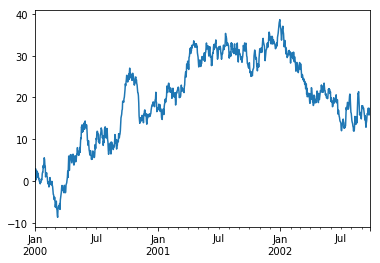

In [138]:
ts.plot()

In [139]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"])

In [140]:
df = df.cumsum()

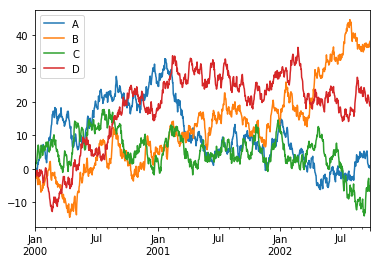

In [141]:
plt.figure();df.plot();plt.legend(loc = "best");

# 導入和保存數據

# CSV

### 寫入CSV文件

In [142]:
df.to_csv("foo.csv")

### 從CSV文件中讀取

In [143]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.656828,-0.748839,-0.358669,-1.359325
1,2000-01-02,0.130826,-1.243114,0.961855,-2.471316
2,2000-01-03,-0.906829,-1.557170,1.755905,-1.720163
3,2000-01-04,-1.228664,-2.892958,1.632086,-0.927038
4,2000-01-05,-0.628378,-2.555413,2.443538,-1.050259
5,2000-01-06,0.072920,-0.910089,2.506777,-0.512432
6,2000-01-07,-0.548039,-2.581959,4.179516,-0.445878
7,2000-01-08,0.823278,-3.907422,5.394283,-1.929205
8,2000-01-09,1.940475,-4.750066,6.387826,-1.597064
9,2000-01-10,1.360515,-2.726731,7.080480,-1.450546


# HDF5 

### 寫入HDF5儲存

In [144]:
df.to_hdf("foo.h5", "df")

### 從HDF5儲存中讀取

In [145]:
pd.read_hdf("foo.h5", "df")


,A,B,C,D
2000-01-01,0.656828,-0.748839,-0.358669,-1.359325
2000-01-02,0.130826,-1.243114,0.961855,-2.471316
2000-01-03,-0.906829,-1.557170,1.755905,-1.720163
2000-01-04,-1.228664,-2.892958,1.632086,-0.927038
2000-01-05,-0.628378,-2.555413,2.443538,-1.050259
2000-01-06,0.072920,-0.910089,2.506777,-0.512432
2000-01-07,-0.548039,-2.581959,4.179516,-0.445878
2000-01-08,0.823278,-3.907422,5.394283,-1.929205
2000-01-09,1.940475,-4.750066,6.387826,-1.597064
2000-01-10,1.360515,-2.726731,7.080480,-1.450546


# Excel

### 寫入excel文件

In [146]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

### 從excel文件中讀取

In [147]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None,na_values=['NA'])

,A,B,C,D
2000-01-01,0.656828,-0.748839,-0.358669,-1.359325
2000-01-02,0.130826,-1.243114,0.961855,-2.471316
2000-01-03,-0.906829,-1.557170,1.755905,-1.720163
2000-01-04,-1.228664,-2.892958,1.632086,-0.927038
2000-01-05,-0.628378,-2.555413,2.443538,-1.050259
2000-01-06,0.072920,-0.910089,2.506777,-0.512432
2000-01-07,-0.548039,-2.581959,4.179516,-0.445878
2000-01-08,0.823278,-3.907422,5.394283,-1.929205
2000-01-09,1.940475,-4.750066,6.387826,-1.597064
2000-01-10,1.360515,-2.726731,7.080480,-1.450546
